Adds parameter handedness and isStronglyRight to HCP

Uses handedness parameter from UKB. See description in https://wiki.humanconnectome.org/docs/HCP-YA%20Data%20Dictionary-%20Updated%20for%20the%201200%20Subject%20Release.html
Handedness parameter ranges from -100 to 100. -100 is strongly left handed, 100 means strongly right handed

In [48]:
import pandas as pd
import numpy as np

In [49]:
input_restricted_file = "/neurospin/dico/jchavas/RESTRICTED_jchavas_1_18_2022_3_17_51.csv"
participants_file = "/neurospin/dico/data/deep_folding/current/datasets/hcp/participants.csv"
output_file = "/neurospin/dico/data/deep_folding/current/datasets/hcp/Handedness/handedness_labels.csv"

In [50]:
df = pd.read_csv(input_restricted_file, index_col=0)
part = pd.read_csv(participants_file, index_col=0)

In [51]:
df

,Age_in_Yrs,HasGT,ZygositySR,ZygosityGT,Family_ID,Mother_ID,Father_ID,TestRetestInterval,Race,Ethnicity,...,SSAGA_Times_Used_Illicits,SSAGA_Times_Used_Cocaine,SSAGA_Times_Used_Hallucinogens,SSAGA_Times_Used_Opiates,SSAGA_Times_Used_Sedatives,SSAGA_Times_Used_Stimulants,SSAGA_Mj_Use,SSAGA_Mj_Ab_Dep,SSAGA_Mj_Age_1st_Use,SSAGA_Mj_Times_Used
Subject,,,,,,,,,,,,,,,,,,,,,
100004,24,True,NotTwin,,52259_82122,52259,82122,NaN,White,Not Hispanic/Latino,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
100206,27,True,NotTwin,,56037_85858,56037,85858,NaN,White,Not Hispanic/Latino,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
100307,27,True,NotMZ,MZ,51488_81352,51488,81352,NaN,White,Not Hispanic/Latino,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
100408,33,True,MZ,MZ,51730_81594,51730,81594,NaN,White,Not Hispanic/Latino,...,4.0,5.0,5.0,5.0,0.0,0.0,1.0,1.0,2.0,4.0
100610,27,True,NotMZ,DZ,52813_82634,52813,82634,NaN,White,Not Hispanic/Latino,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992774,35,True,NotTwin,,51345_81210,51345,81210,NaN,White,Not Hispanic/Latino,...,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,2.0
993675,29,True,NotTwin,,55800_85621,55800,85621,NaN,White,Not Hispanic/Latino,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
994273,30,True,NotTwin,,52364_82227,52364,82227,NaN,White,Not Hispanic/Latino,...,4.0,0.0,5.0,5.0,5.0,0.0,1.0,1.0,2.0,5.0


In [52]:
res = df[["Handedness"]].merge(part[["Gender"]], left_index=True, right_index=True)

In [53]:
(df["Handedness"]>70).sum()

748

In [54]:
(df["Handedness"]<-70).sum()

39

<AxesSubplot:>

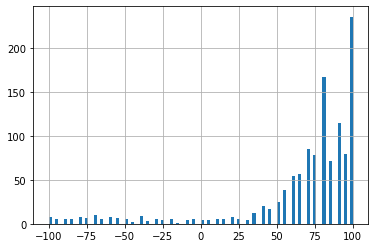

In [55]:
df["Handedness"].hist(bins=100)

In [56]:
res["isRightHanded"] = (res["Handedness"]>=0).astype(int)

In [57]:
res["isStronglyRightHanded"] = res.apply(lambda x: 0 if x['Handedness'] < -70 else 1 if x['Handedness'] > 70 else np.nan, axis=1)

In [58]:
(res["isStronglyRightHanded"]==1).sum()

748

In [59]:
res

,Handedness,Gender,isRightHanded,isStronglyRightHanded
Subject,,,,
100004,95,M,1,1.0
100206,65,M,1,NaN
100307,95,F,1,1.0
100408,55,M,1,NaN
100610,85,M,1,1.0
...,...,...,...,...
992774,100,M,1,1.0
993675,85,F,1,1.0
994273,60,M,1,NaN


In [60]:
res.to_csv(output_file)